The main objective of this project is to create whether patient has a diabetics or not using a classification model.

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


In [116]:
traindata=pd.read_csv("C:/Users/acer/DataScience/train.csv",index_col=0)
traindata.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
Id,,,,,,,,,,,,,,,,,
0,33,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,66,Male,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0
2,60,Female,0,1,1,1,1,1,1,0,1,1,1,1,0,0,1
3,35,Female,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1
4,32,Male,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [57]:
traindata.shape

(416, 17)

In [60]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 0 to 415
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 416 non-null    int64 
 1   gender              416 non-null    object
 2   polyuria            416 non-null    int64 
 3   polydipsia          416 non-null    int64 
 4   sudden_weight_loss  416 non-null    int64 
 5   weakness            416 non-null    int64 
 6   polyphagia          416 non-null    int64 
 7   genital_thrush      416 non-null    int64 
 8   visual_blurring     416 non-null    int64 
 9   itching             416 non-null    int64 
 10  irritability        416 non-null    int64 
 11  delayed_healing     416 non-null    int64 
 12  partial_paresis     416 non-null    int64 
 13  muscle_stiffness    416 non-null    int64 
 14  alopecia            416 non-null    int64 
 15  obesity             416 non-null    int64 
 16  class               416 no

In [58]:
y=traindata['class']
X=traindata[['polyuria','polydipsia','sudden_weight_loss','weakness','polyphagia','genital_thrush','visual_blurring','itching',
         'irritability','delayed_healing','partial_paresis','muscle_stiffness','alopecia','obesity']]

X.head()

,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
Id,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,1,1,0,1,1,1,1,0
2,0,1,1,1,1,1,1,0,1,1,1,1,0,0
3,1,1,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [148]:
#splitting into validation and training data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
X_train.head()


,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
Id,,,,,,,,,,,,,,
339,0,0,0,1,0,0,0,1,0,1,0,1,1,0
208,1,1,1,1,1,0,1,1,1,1,1,1,0,0
56,0,0,1,1,1,0,0,0,0,0,0,1,0,0
8,1,0,1,0,1,0,0,0,1,0,0,1,0,1
398,0,0,1,1,1,1,0,1,0,1,0,0,0,0


In [149]:
#Checking the shape of X_train and X_test
X_train.shape,X_test.shape

((312, 14), (104, 14))

In [150]:
#Applying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier(n_estimators=100,random_state=0)
random_forest_model.fit(X_train,y_train.ravel())

RandomForestClassifier(random_state=0)

In [151]:
#predicting the test set results
y_predict=random_forest_model.predict(X_test)
print (y_predict)
y_predict.shape

[1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1]


(104,)

In [152]:
#checking the accuracy score
from sklearn import metrics
print("Accuracy={0:.3f}".format(metrics.accuracy_score(y_test,y_predict)))

Accuracy=0.971


In [153]:
#Selecting the important features using Random Forest Model
#viewing the feature score using features important score
features_score=pd.Series(random_forest_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
features_score

polydipsia            0.217744
polyuria              0.179560
partial_paresis       0.090620
sudden_weight_loss    0.078277
alopecia              0.057060
polyphagia            0.052893
visual_blurring       0.052364
irritability          0.050775
itching               0.043195
weakness              0.041803
delayed_healing       0.039049
genital_thrush        0.034752
muscle_stiffness      0.031621
obesity               0.030286
dtype: float64

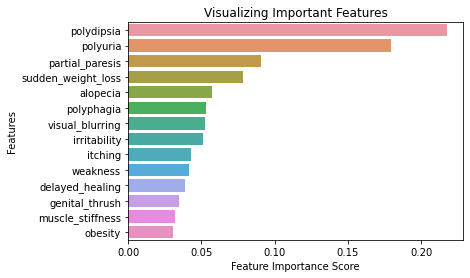

In [154]:
# Creating a bar plot
import seaborn as sns
sns.barplot(x=features_score, y=features_score.index)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.show()

In [155]:
my_submission = pd.DataFrame({'Class':y_predict})
my_submission.index.name='Id'
my_submission.head()

,Class
Id,
0,1
1,1
2,0
3,1
4,0


In [156]:
my_submission.to_csv('submission1.csv')